In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
df_batsman = pd.read_csv('dataset/batsman_level_scorecard.csv')
df_bowler = pd.read_csv('dataset/bowler_level_scorecard.csv')
df_match = pd.read_csv('dataset/match_level_scorecard.csv')

In [3]:
df_train.head()

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,...,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,...,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,Ne,...,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,36084,Ga An Ws,...,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,Gt Ts,...,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000


In [4]:
df_test.head()

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,Ud Ss of Aa,field,Bo Ac Cb,...,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,Ja Ts,field,Pe Sm Ga,...,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.500
2,9128776,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,Lw Sr Gs,48334,2654014.0:2954769.0:8058903.0:3479860.0:329940...,Rn Rs,bat,Be Sm Mi,...,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,171.066667,100.00,179.625
3,9586919,Ja Ts,36098,4690258.0:8464385.0:1613898.0:5744780.0:315072...,St La Ks,36112,2331475.0:313809.0:391103.0:2742837.0:2097017....,St La Ks,field,Dn Sy Nl Ct Sm Gs It St La,...,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,166.000000,75.00,155.500
4,9128538,Ci Sr Ks,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:...,Gt Ts,48341,1958683.0:7491224.0:3339160.0:5452754.0:225245...,Gt Ts,field,Ma Ct An Sm Pe,...,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,169.933333,0.00,164.125


In [5]:
## Print multiple output per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [6]:
## Importing libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [7]:
## Pandas Display options
pd.set_option('display.max_columns',0)
pd.set_option('display.max_colwidth',0)

In [8]:
## Creating a binary winner column - 0 if team1 wins, else 1
df_train['winner_01'] = df_train.apply(lambda x: 0 if (x['team1']==x['winner']) else 1, axis=1)

In [9]:
from matplotlib import pyplot as plt
plt.style.use('seaborn');
import re

def createRnP(X_12, feature, N=5, ylim_lb=0.3, ylim_ub=0.7):
    '''
    Rank and Plot of input feature on the input data. The y-axis shows %team1 wins in each bucket.
    
    Parameters-
    1. X_12: dataset to build the RnP on. 
    2. feature: Feature to build RnP of.
    3. N: number of bins on x-axis. Default 5.
    4. ylim_lb: lower bound of y axis on plot.
    5. ylim_ub: upper bound of y axis on plot.
    
    Output-
    1. Rank and Plot
    
    Returns- None
    '''
    df = X_12.copy()
    df[f'{feature}_bin'] = df[feature].rank(pct=True)//(1/N) # divide feature values for all games in 5 equi-volume buckets.
    df['count'] = 1
    df['team1_win%'] = df['winner_01'].apply(lambda x: 1-x) # invert winner_01 to get team1 winner indicator
    df['team2_win%'] = df['winner_01'].copy()
    df[f'{feature}_min'] = df[feature].copy()
    df[f'{feature}_max'] = df[feature].copy()
    df_g = df.groupby(f'{feature}_bin').agg({'team1_win%':'mean', 'team2_win%':'mean', 'count':'sum', f'{feature}_min':'min',\
                                            f'{feature}_max':'max'}).reset_index()
    N = min(N,df_g.shape[0])
    blue_bar = df_g['team1_win%'].values.tolist()
    ind = np.arange(N)
    # plotting starts
    plt.figure(figsize=(10,5));
    plt.bar(ind, blue_bar, label='Team 1 win%');
    plt.axhline(y=0.5, linewidth=0.5, color='k', linestyle = '--')
    xlabel = re.sub('team_','ratio_',feature)
    plt.xlabel(f'{xlabel} (team1 / team2) bins');
    plt.ylabel('Win %');
    plt.title(f'RnP - {feature} vs win');
    df_g['xticks'] = df_g.apply(lambda x: str(round(x[f'{feature}_min'],2)) + ' - ' + str(round(x[f'{feature}_max'],2)), axis=1)
    plt.xticks(ind, df_g['xticks']);
    plt.ylim([ylim_lb,ylim_ub]);
    plt.legend(loc='best');
    x2,x1 = blue_bar[-1],blue_bar[0]
    slope = x2/x1
    if slope < 1:
        slope = 1/slope
        x1,x2 = x2,x1
    print('slope:', round(x2,2),'/',round(x1,2), '= ',round(slope,2))
    plt.show()

In [10]:
def giveLastNgamesPlayer(player_id, date, n, bat_or_bowl):
    '''
    Function to get last n games stats of a player before an input date.
    
    Input-
    1. player_id: id of the player to get historical data.
    2. date: date to look-back and get n games. Stats returned are before this input date.
    3. n: Number of historical games stats to return.
    4. bat_or_bowl: Kind of stats to return. {'bat': batting stats to return, 'bowl': bowling stats to return}
    
    Output-None
    
    Returns- dataframe having bowling/batting stats from last n games of a player before an input date. 
    The results are sorted by date.
    '''
    if bat_or_bowl == 'bat':
        df_topick = df_batsman
        id_col = 'batsman_id'
    else:
        df_topick = df_bowler
        id_col = 'bowler_id'
        
    return df_topick[(df_topick['match_dt']<date)&(df_topick[id_col]==float(player_id))]\
                .sort_values(by='match_dt', ascending=False).head(n)

In [11]:
def no50sLastn(player_list, date, n):
    '''
    Function to get total number of 50s scored by players in the roster of a team in last n games.
    
    Input-
    1. player_list: ':' separated list of player ids in the roster of a team.
    2. date: match date of the game to calculate this feature.
    3. n: Number of games to look-back and create this feature.
    
    Output-None
    
    Returns- int value denoting sum of 50s scored by all players in the roster.
    '''
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    res_list = []
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting batting stats from last n games for each player.
        df_rel['gte_50runs'] = np.where(df_rel['runs']>=50, 1, 0) # binary indicator to denote whether the player scored a 50 in the game (runs>=50).
        res_list.append(np.nansum(df_rel['gte_50runs']))# Sum up number of 50s for the player and append to a list. We will do this for all players.
    return np.nansum(res_list)# Sum up values of the list which is sum of 50s by all players in the roster.

# Computing number of 50 runs in last 15 games for team1 for train dataset.
df_train['team1_count_50runs_last15'] = df_train.progress_apply(lambda x: \
            no50sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Computing number of 50 runs in last 15 games for team2 for train dataset.
df_train['team2_count_50runs_last15'] = df_train.progress_apply(lambda x: \
            no50sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
# Taking ratio of (number of 50 runs in last 15 games for team1) to (number of 50 runs in last 15 games for team2). Adding 1 to handle divide by zero exceptions.
df_train['team_count_50runs_last15'] = (df_train['team1_count_50runs_last15']+1)/(df_train['team2_count_50runs_last15']+1)
df_train.drop(columns=['team1_count_50runs_last15','team2_count_50runs_last15'], inplace=True) # dropping intermediate columns

## Doing similar process for test dataset

df_test['team1_count_50runs_last15'] = df_test.progress_apply(lambda x: \
            no50sLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
df_test['team2_count_50runs_last15'] = df_test.progress_apply(lambda x: \
            no50sLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)
df_test['team_count_50runs_last15'] = (df_test['team1_count_50runs_last15'])/(df_test['team2_count_50runs_last15']+1)
df_test.drop(columns=['team1_count_50runs_last15','team2_count_50runs_last15'], inplace=True)

df_train.tail(2)
df_test.head(2)

100%|██████████| 271/271 [00:06<00:00, 44.68it/s]


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,winner_01
946,9516695,Rn Rs,30428,8058959.0:2162782.0:2981614.0:4690188.0:2125696.0:8228429.0:184960.0:3068547.0:3696482.0:8445478.0:3011735.0:6347494.0,Ss Hd,36014,5958840.0:7491294.0:3127354.0:3057312.0:4203499.0:5764576.0:8228408.0:4874820.0:8766603.0:7570107.0:2282125.0:5618038.0,Ss Hd,36014,Rn Rs,bat,Si Mh Sm Jr,Jaipur,2023-05-07,night match,In Pr Le,2023,4661,0.789474,1.487805,182.800000,66.67,133.375000,1
947,9433633,He,7727,4223883.0:2076192.0:8822729.0:5241564.0:2020332.0:3162487.0:1482249.0:1482998.0:2173688.0:5788418.0:8833075.0,Ge,7608,4898074.0:3220566.0:8048074.0:6988596.0:8072945.0:2667027.0:6341796.0:3578742.0:1707628.0:2538983.0:2437091.0,Ge,7608,Ge,field,Cy Gd Bl,Bristol,2023-06-20,day/night match,Vy Bt,2023,1245,4.000000,1.975610,167.333333,100.00,164.192308,1


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5


slope: 0.6 / 0.39 =  1.53


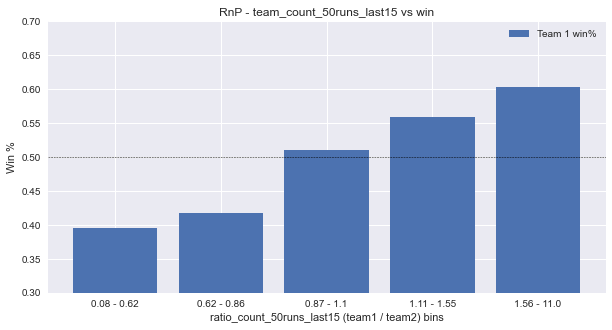

In [12]:
# RnP of team_winp_last5 computed over the train data.
createRnP(df_train, 'team_count_50runs_last15')

In [13]:
def winpLastn(team_id, date, n):
    '''
    Get a team's win % in last n games. If a team has won 3 game out of their last 5, win% is 60%.
    
    Input-
    1. team_id: ID of the team to get their last n games and winner information from those games.
    2. date: match date from which to get last n historical games.
    3. n: look-back window of games.
    
    Output- None
    
    Returns- Float value denoting win% of the team in last n games.
    '''
    # filter out games with either team1/2_id as input team id, match_dt being before current game's date, sort desc by date, and get top n rows (games)
    df_rel = df_match[(df_match['match_dt']<date)&\
                      ((df_match['team1_id']==team_id)|(df_match['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n) 
    win_count = df_rel[df_rel['winner_id']==team_id].shape[0] # count number of rows having winner as the input team
    if win_count == 0:
        return 0
    return round(win_count*100/df_rel.shape[0], 2) # return win% rounded to two decimal points

In [14]:
# Compute team1's win% in last 5 games
df_train['team1_winp_last5'] = df_train.progress_apply(lambda x: \
                                  winpLastn(x['team1_id'], x['match_dt'], 5), axis=1)
# Compute team2's win% in last 5 games
df_train['team2_winp_last5'] = df_train.progress_apply(lambda x: \
                                  winpLastn(x['team2_id'], x['match_dt'], 5), axis=1)

100%|██████████| 948/948 [00:00<00:00, 1009.01it/s]


In [15]:
# Take the ratio of (team1's win% in their last 5 games)/(team2's win% in their last 5 games). Adding 1 to avoid divide by zero error
df_train['team_winp_last5'] = (df_train['team1_winp_last5']+1)/(df_train['team2_winp_last5']+1)
df_train.drop(columns=['team1_winp_last5', 'team2_winp_last5'], inplace=True) # drop intermediate columns

In [16]:
df_train.shape
df_train.head(5)

(948, 24)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,winner_01
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571,1
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000,0
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:3681957.0:7671313.0:5320118.0:2922611.0:7184232.0:7661996.0:6240632.0,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:5516720.0:7328110.0:125915.0:130437.0:7507303.0:4420828.0:5652828.0,We,10576,Ne,field,Tt Be Nm,Nottingham,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,154.333333,0
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:4690188.0:4739580.0:4739552.0:5744850.0:2294823.0:9266102.0:284339.0,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:5742470.0:2740408.0:3575774.0:3200756.0:334963.0:6399210.0:6347494.0,Ga An Ws,36084,Ga An Ws,bat,Bn La Sm Ta Td,Tarouba,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000,0
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082.0:4640824.0:5038046.0:8180500.0:2035102.0:3851518.0:7881845.0:7453697.0,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:2252452.0:2966879.0:5554254.0:4690230.0:3373285.0:3759846.0:6496482.0,Gt Ts,48341,Gt Ts,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000,1


In [17]:
## Similar process for test data

df_test['team1_winp_last5'] = df_test.progress_apply(lambda x: \
            winpLastn(team_id=x['team1_id'], date=x['match_dt'], n=5), axis=1)
df_test['team2_winp_last5'] = df_test.progress_apply(lambda x: \
            winpLastn(team_id=x['team2_id'], date=x['match_dt'], n=5), axis=1)
df_test['team_winp_last5'] = (df_test['team1_winp_last5']+1)/(df_test['team2_winp_last5']+1)
df_test.drop(columns=['team1_winp_last5','team2_winp_last5'], inplace=True)
df_test.shape
df_test.head(2)

100%|██████████| 271/271 [00:00<00:00, 1055.19it/s]


(271, 21)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.5


In [18]:
# derived feature computed using toss winner & toss decision to denote the inning team1 bats.
# If team1 won the toss and chose to bat or team2 won the toss and chose to bowl, the feature takes the value 1, else 2.
df_match['team1_bat_inning'] = np.where( ((df_match['team1']==df_match['toss winner'])&(df_match['toss decision']=='bat'))|\
                                               ((df_match['team2']==df_match['toss winner'])&(df_match['toss decision']=='field')) , 1, 2)


# In[28]:


df_match.head(2)


,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,umpire1,umpire2,inning1_runs,inning1_wickets,inning1_balls,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id,team1_bat_inning
0,8638034,Nn Ds,Wn,Wn,wickets,9.0,Wn,field,By Ol,Mount Maunganui,2021-01-01,night match,Sr Sh,2020/21,17681,Dn Mw,TJ Pe,148,6,130,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0:3834305.0:3776849.0:6718340.0:3566240.0:4950364.0:7543647.0,18570,2653993.0:6718326.0:6718382.0:2486896.0:2288789.0:4950224.0:8187878.0:3083667.0:4950294.0:6718396.0:1585464.0,other_domestic,18570,NaN,1
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,Carrara,2021-01-01,night match,Bg Bh Le,2020/21,6663,D Tr,PJ Ge,166,6,106,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1594319.0:7534687.0:7537067.0:1905847.0:8339701.0:7620346.0,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652.0:5788320.0:1612610.0:5509524.0:5497274.0:3876613.0:8193310.0,other_domestic,33963,1749075.0,1


slope: 0.58 / 0.4 =  1.47


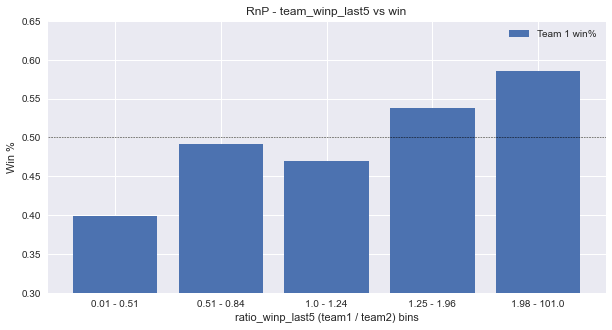

In [19]:
# RnP of team_winp_last5 computed over the train data.
createRnP(df_train, 'team_winp_last5', ylim_ub=0.65)

In [20]:
def teamAvgRunsLastn(team_id, date, n):
    '''
    Function to calculate a team's average runs in their last n games.
    
    Input-
    1. team_id: ID of the team to calculate average runs.
    2. date: match date of the current game for which the feature is calculated.
    3. n: look-back window of games for the team.
    
    Output- None
    
    Return- Float value denoting average of runs scored by team1 in their last n games.
    '''
    # filter out games with either team1/2_id as input team_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df_rel = df_match[(df_match['match_dt']<date)&\
                      ((df_match['team1_id']==team_id)|(df_match['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    # combine two dataframes - one where input team is batting first, and another one where input team is batting second.
    df_rel = pd.concat([ df_rel[df_rel['team1_bat_inning']==1][['inning1_runs']].rename(columns={'inning1_runs':'runs'}), \
                         df_rel[df_rel['team1_bat_inning']==2][['inning2_runs']].rename(columns={'inning2_runs':'runs'}) ] )
    return df_rel['runs'].mean() # return mean of the combined dataframe.
  
  # Compute average runs scored by team1 in their last 15 games for train data.
df_train['team1only_avg_runs_last15'] = df_train.progress_apply(lambda x: \
                                  teamAvgRunsLastn(x['team1_id'], x['match_dt'], 15), axis=1)
df_test['team1only_avg_runs_last15'] = df_test.progress_apply(lambda x: \
            teamAvgRunsLastn(x['team1_id'], x['match_dt'], 15), axis=1)
  # Compute average runs scored by team2 in their last 15 games for train data.
df_train['team2only_avg_runs_last15'] = df_train.progress_apply(lambda x: \
                                  teamAvgRunsLastn(x['team2_id'], x['match_dt'], 15), axis=1)
df_test['team2only_avg_runs_last15'] = df_test.progress_apply(lambda x: \
            teamAvgRunsLastn(x['team2_id'], x['match_dt'], 15), axis=1)

# Create a ratio feature for the average bowling economy
df_train['team_avg_runs_last15'] = (df_train['team1only_avg_runs_last15']+1) / \
                                                (df_train['team2only_avg_runs_last15'] + 1)
df_test['team_avg_runs_last15'] = (df_test['team1only_avg_runs_last15']+1) / \
                                               (df_test['team2only_avg_runs_last15'] + 1)
                                               
df_train.drop(columns=['team1only_avg_runs_last15', 'team2only_avg_runs_last15'], inplace=True)
df_test.drop(columns=['team1only_avg_runs_last15', 'team2only_avg_runs_last15'], inplace=True)

df_test.head(2)
df_train.head(2)

100%|██████████| 271/271 [00:00<00:00, 364.35it/s]


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,0.00,NaN,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,66.67,153.5,0.896853


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,winner_01,team_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,100.0,157.178571,1,0.991629
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,50.0,103.500000,0,0.977178


slope: 0.49 / 0.44 =  1.12


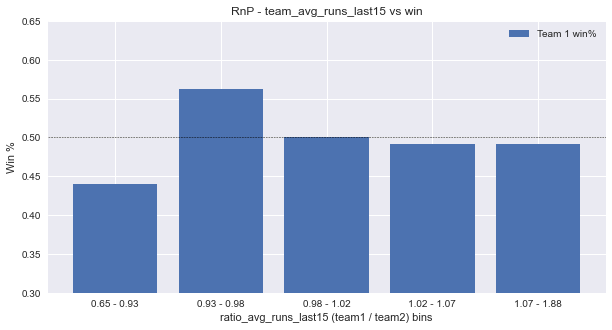

In [21]:
# RnP of team_winp_last5 computed over the train data.
createRnP(df_train, 'team_avg_runs_last15', ylim_ub=0.65)

In [22]:
def winpCrossLastn(team1_id, team2_id, date, n):
    '''
    Function to compute team1's win% against team2 from the current game in their past n encounters.
    
    Input-
    1. team1_id: ID of team1 to calculate win% of.
    2. team2_id: ID of team2 to calculate win% against.
    3: date: match date of the current game for which the feature is to be calculated.
    4. n: look-back window of games for both these teams.
    
    Output- None
    
    Returns- Float value denoting team1's win% against team2 in their past n games against each other.
    '''
    # filter out games where either team1_id is input team1 and team2_id is input team2, or where team2_id is input team1 and team1_id is input team2.
    # Also, match date is less than current games's input date, sort desc by date and get top n rows (games)
    df_rel = df_match[(df_match['match_dt']<date)&\
                      (((df_match['team1_id']==team1_id)&(df_match['team2_id']==team2_id))|((df_match['team1_id']==team2_id)&(df_match['team2_id']==team1_id)))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    win_count = df_rel[df_rel['winner_id']==team1_id].shape[0] # Counting number of rows (games) where winner is input team1.
    if win_count == 0:
        return 0
    return round(win_count*100/df_rel.shape[0], 2) # return Float denoting team1's win% against team2 in past n games rounded to 2 decimal places.

# Compute team1 win% against team2 in their past 15 encounters for train data.
df_train['team1_winp_team2_last15'] = df_train.progress_apply(lambda x: \
                                  winpCrossLastn(x['team1_id'], x['team2_id'], x['match_dt'], 5), axis=1)
df_test['team1_winp_team2_last15'] = df_test.progress_apply(lambda x: \
                                  winpCrossLastn(x['team1_id'], x['team2_id'], x['match_dt'], 5), axis=1)
df_train.head(2)
df_test.head(2)

100%|██████████| 271/271 [00:00<00:00, 801.55it/s]


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,winner_01,team_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,100.0,157.178571,1,0.991629
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,50.0,103.500000,0,0.977178


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,0.00,NaN,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,66.67,153.5,0.896853


slope: 0.52 / 0.45 =  1.16


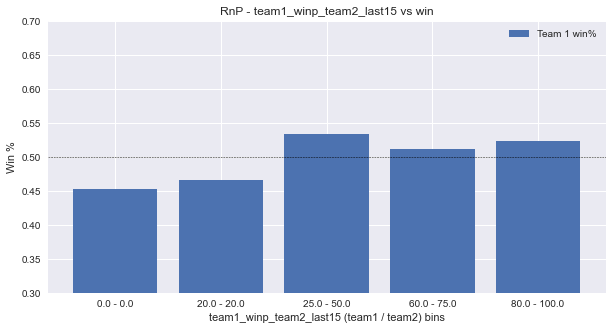

In [23]:
createRnP(df_train, 'team1_winp_team2_last15')

In [24]:
def avgRunsGround(ground_id, date, n):
    '''
    Function to calculate average runs scored in ground/venue.
    
    Input-
    1. ground_id: ID of the ground to calculate the feature for.
    2. date: match date of the current game to calculate the feature for.
    3. n: look-back window of games for the ground.
    
    Output- None
    
    Returns- Average runs scored in the ground.
    '''
    # filter out games with ground_id being the input ground_id and date earlier than current game's input date. Sort desc by date, and select top n rows (games).
    df_rel = df_match[(df_match['match_dt']<date)&(df_match['ground_id']==ground_id)].sort_values(by='match_dt', ascending=False).head(n)
    df_rel['avg_runs_inn'] = (df_rel['inning1_runs']+df_rel['inning2_runs'])/2 # take the mean of inning1_runs and inning2_runs in a separate column.
    return df_rel['avg_runs_inn'].mean() # Return the mean value of the computed column above.

## Calculate average runs in the ground for last 15 games hosted in that venue for train data.
df_train['ground_avg_runs_last15'] = df_train.progress_apply(lambda x: \
                                  avgRunsGround(x['ground_id'], x['match_dt'], 15), axis=1)
## Similarly for test data.
df_test['ground_avg_runs_last15'] = df_test.progress_apply(lambda x: \
                                  avgRunsGround(x['ground_id'], x['match_dt'], 15), axis=1)

df_train.head(2)
df_test.head(2)

100%|██████████| 271/271 [00:00<00:00, 928.99it/s] 


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,winner_01,team_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,100.0,157.178571,1,0.991629
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,50.0,103.500000,0,0.977178


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,0.00,NaN,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,66.67,153.5,0.896853


slope: 0.5 / 0.45 =  1.1


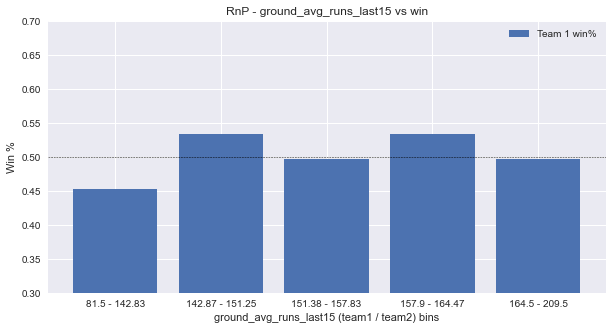

In [25]:
createRnP(df_train, 'ground_avg_runs_last15')

In [26]:
def avgBowlingEconomyLastn(player_list, date, n):
    
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    economy_list = []
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl')  # getting bowling stats from last n games for each player.
        df_rel['economy'] = df_rel['runs'] / (df_rel['balls_bowled'] / 6)  # Calculate economy rate
        economy_list.append(np.nanmean(df_rel['economy']))  # Append average economy rate to the list
    return np.nanmean(economy_list)  # Return the mean of the list which is the average economy rate of all players in the roster.

# Compute average bowling economy for team1 and team2 in their last 15 games for train dataset
df_train['team1_avg_bowling_economy_last15'] = df_train.progress_apply(lambda x: \
            avgBowlingEconomyLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
df_train['team2_avg_bowling_economy_last15'] = df_train.progress_apply(lambda x: \
            avgBowlingEconomyLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

# Similarly for test dataset
df_test['team1_avg_bowling_economy_last15'] = df_test.progress_apply(lambda x: \
            avgBowlingEconomyLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
df_test['team2_avg_bowling_economy_last15'] = df_test.progress_apply(lambda x: \
            avgBowlingEconomyLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

# Create a ratio feature for the average bowling economy
df_train['team_avg_bowling_economy_last15'] = 1 - (df_train['team1_avg_bowling_economy_last15']+1) / \
                                                (df_train['team2_avg_bowling_economy_last15'] + 1)
df_test['team_avg_bowling_economy_last15'] = 1 - (df_test['team1_avg_bowling_economy_last15']+1) / \
                                               (df_test['team2_avg_bowling_economy_last15'] + 1)

df_train.drop(columns=['team1_avg_bowling_economy_last15', 'team2_avg_bowling_economy_last15'], inplace=True)
df_test.drop(columns=['team1_avg_bowling_economy_last15', 'team2_avg_bowling_economy_last15'], inplace=True)

# Checking the shape and head of the datasets
df_train.shape
df_train.head(2)
df_train.shape
df_test.head(2)


  0%|          | 0/948 [00:00<?, ?it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\1793455629.py:8: RuntimeWarning: Mean of empty slice
  economy_list.append(np.nanmean(df_rel['economy']))  # Append average economy rate to the list
  2%|▏         | 18/948 [00:00<00:16, 57.52it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\1793455629.py:9: RuntimeWarning: Mean of empty slice
  return np.nanmean(economy_list)  # Return the mean of the list which is the average economy rate of all players in the roster.
  0%|          | 0/948 [00:00<?, ?it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\1793455629.py:8: RuntimeWarning: Mean of empty slice
  economy_list.append(np.nanmean(df_rel['economy']))  # Append average economy rate to the list
  6%|▌         | 53/948 [00:01<00:18, 47.75it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\1793455629.py:9: RuntimeWarning: Mean of empty slice
  return np.nanmean(economy_list)  # Return the mean of the list which is the average economy rat

(948, 25)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,winner_01,team_avg_runs_last15,team_avg_bowling_economy_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,100.0,157.178571,1,0.991629,0.056633
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,50.0,103.500000,0,0.977178,0.028851


(948, 25)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15,team_avg_bowling_economy_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,0.00,NaN,NaN,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,66.67,153.5,0.896853,0.0129


slope: 0.58 / 0.45 =  1.27


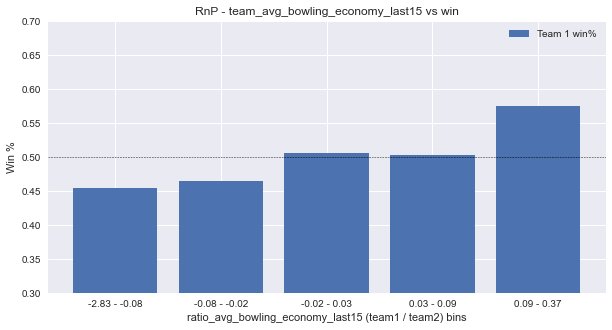

In [27]:
createRnP(df_train, 'team_avg_bowling_economy_last15')

In [28]:
def avgStrikeRateLastn(player_list, date, n):
    '''
    
    '''
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    strike_rate_list = []
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat')  # getting batting stats from last n games for each player.
        df_rel['strike_rate'] = (df_rel['runs'] / df_rel['balls_faced']) * 100  # Calculate strike rate
        strike_rate_list.append(np.nanmean(df_rel['strike_rate']))  # Append average strike rate to the list
    return np.nanmean(strike_rate_list)  # Return the mean of the list which is the average strike rate of all players in the roster.

# Compute average strike rate for team1 and team2 in their last 15 games for train dataset
df_train['team1_avg_strike_rate_last15'] = df_train.progress_apply(lambda x: \
            avgStrikeRateLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
df_train['team2_avg_strike_rate_last15'] = df_train.progress_apply(lambda x: \
            avgStrikeRateLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

# Similarly for test dataset
df_test['team1_avg_strike_rate_last15'] = df_test.progress_apply(lambda x: \
            avgStrikeRateLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
df_test['team2_avg_strike_rate_last15'] = df_test.progress_apply(lambda x: \
            avgStrikeRateLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

# Create a ratio feature for the average strike rate
df_train['team_avg_strike_rate_last15'] = (df_train['team1_avg_strike_rate_last15']+1) / \
                                            (df_train['team2_avg_strike_rate_last15'] + 1)
df_test['team_avg_strike_rate_last15'] = (df_test['team1_avg_strike_rate_last15'] +1)/ \
                                           (df_test['team2_avg_strike_rate_last15'] + 1)

df_train.drop(columns=['team1_avg_strike_rate_last15', 'team2_avg_strike_rate_last15'], inplace=True)
df_test.drop(columns=['team1_avg_strike_rate_last15', 'team2_avg_strike_rate_last15'], inplace=True)

# Checking the shape and head of the datasets
df_train.shape
df_train.head(2)
df_test.shape
df_test.head(2)


  0%|          | 0/948 [00:00<?, ?it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\2261694220.py:10: RuntimeWarning: Mean of empty slice
  strike_rate_list.append(np.nanmean(df_rel['strike_rate']))  # Append average strike rate to the list
  2%|▏         | 19/948 [00:00<00:21, 42.75it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\2261694220.py:11: RuntimeWarning: Mean of empty slice
  return np.nanmean(strike_rate_list)  # Return the mean of the list which is the average strike rate of all players in the roster.
  0%|          | 0/948 [00:00<?, ?it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\2261694220.py:10: RuntimeWarning: Mean of empty slice
  strike_rate_list.append(np.nanmean(df_rel['strike_rate']))  # Append average strike rate to the list
  6%|▌         | 55/948 [00:01<00:18, 47.39it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\2261694220.py:11: RuntimeWarning: Mean of empty slice
  return np.nanmean(strike_rate_list)  # Return the mean of the list which i

(948, 26)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,winner_01,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,100.0,157.178571,1,0.991629,0.056633,0.974171
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,50.0,103.500000,0,0.977178,0.028851,0.860877


(271, 23)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,0.00,NaN,NaN,NaN,0.766039
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,66.67,153.5,0.896853,0.0129,1.087214


slope: 0.54 / 0.37 =  1.48


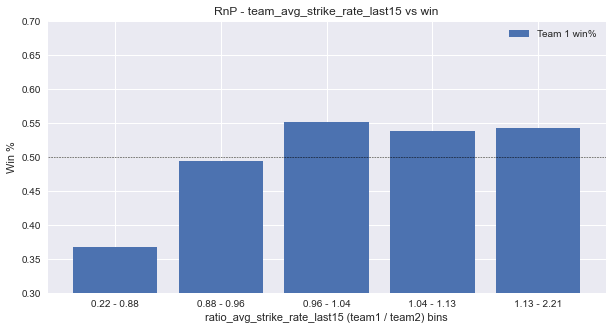

In [29]:
createRnP(df_train, 'team_avg_strike_rate_last15')

In [30]:
def avgTotalBoundariesLastn(player_list, date, n):
   
    player_list = str(player_list).split(':')
    total_boundaries = 0
    total_matches = 0
    
    for player in player_list:
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat')
        if not df_rel.empty and 'Fours' in df_rel.columns and 'Sixes' in df_rel.columns:
            total_boundaries += df_rel['Fours'].sum() + df_rel['Sixes'].sum()
            total_matches += len(df_rel)
    
    avg_boundaries = (total_boundaries / total_matches) if total_matches else np.nan
    
    return avg_boundaries

# Assuming df_train is your training DataFrame
df_train['team1_avg_total_boundaries_last15'] = df_train.progress_apply(lambda x: \
            avgTotalBoundariesLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
df_train['team2_avg_total_boundaries_last15'] = df_train.progress_apply(lambda x: \
            avgTotalBoundariesLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

df_train['team_avg_total_boundaries_last15'] = (df_train['team1_avg_total_boundaries_last15']+1)/ \
                                                (df_train['team2_avg_total_boundaries_last15'] + 1)

df_train.drop(columns=['team1_avg_total_boundaries_last15', 'team2_avg_total_boundaries_last15'], inplace=True)


# Assuming df_test is your testing DataFrame
df_test['team1_avg_total_boundaries_last15'] = df_test.progress_apply(lambda x: \
            avgTotalBoundariesLastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=15), axis=1)
df_test['team2_avg_total_boundaries_last15'] = df_test.progress_apply(lambda x: \
            avgTotalBoundariesLastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=15), axis=1)

df_test['team_avg_total_boundaries_last15'] = (df_test['team1_avg_total_boundaries_last15']+1) / \
                                               (df_test['team2_avg_total_boundaries_last15'] + 1)

df_test.drop(columns=['team1_avg_total_boundaries_last15', 'team2_avg_total_boundaries_last15'], inplace=True)

df_train.head(2)

df_test.head(2)

100%|██████████| 271/271 [00:04<00:00, 56.79it/s]


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,winner_01,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15,team_avg_total_boundaries_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,100.0,157.178571,1,0.991629,0.056633,0.974171,0.907129
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,50.0,103.500000,0,0.977178,0.028851,0.860877,0.937388


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15,team_avg_total_boundaries_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,0.00,NaN,NaN,NaN,0.766039,0.670732
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,66.67,153.5,0.896853,0.0129,1.087214,1.022600


slope: 0.55 / 0.45 =  1.22


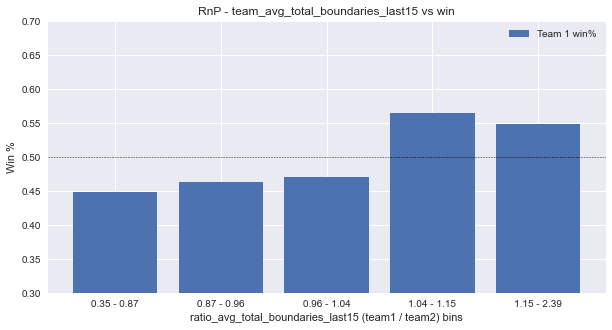

In [31]:
createRnP(df_train, 'team_avg_total_boundaries_last15')

In [32]:
def avgWinMargin(team_id, date, n):
    df_team = df_match[((df_match['team1_id'] == team_id) | (df_match['team2_id'] == team_id)) & (df_match['winner_id'] == team_id)]
    df_team_last_n = df_team[df_team['match_dt'] < date].tail(n)
    win_margin_runs = np.nanmean(df_team_last_n[df_team_last_n['by'] == 'runs']['win amount'])
    win_margin_wickets = np.nanmean(df_team_last_n[df_team_last_n['by'] == 'wickets']['win amount'])
    return win_margin_runs, win_margin_wickets

df_train['team1_avg_win_margin_runs'], df_train['team1_avg_win_margin_wickets'] = zip(*df_train.progress_apply(lambda x: \
            avgWinMargin(team_id=x['team1_id'], date=x['match_dt'], n=15), axis=1))
df_train['team2_avg_win_margin_runs'], df_train['team2_avg_win_margin_wickets'] = zip(*df_train.progress_apply(lambda x: \
            avgWinMargin(team_id=x['team2_id'], date=x['match_dt'], n=15), axis=1))


df_train['team_avg_win_runs_ratio'], df_train['team_avg_win_wickets_ratio'] = (df_train['team1_avg_win_margin_runs'] + 1) / (df_train['team2_avg_win_margin_runs'] + 1),(df_train['team1_avg_win_margin_wickets']+1)/(df_train['team2_avg_win_margin_wickets']+1)


df_test['team1_avg_win_margin_runs'], df_test['team1_avg_win_margin_wickets'] = zip(*df_test.progress_apply(lambda x: \
            avgWinMargin(team_id=x['team1_id'], date=x['match_dt'], n=15), axis=1))
df_test['team2_avg_win_margin_runs'], df_test['team2_avg_win_margin_wickets'] = zip(*df_test.progress_apply(lambda x: \
            avgWinMargin(team_id=x['team2_id'], date=x['match_dt'], n=15), axis=1))
df_test['team_avg_win_runs_ratio'], df_test['team_avg_win_wickets_ratio'] = (df_test['team1_avg_win_margin_runs'] + 1) / (df_test['team2_avg_win_margin_runs'] + 1),(df_test['team1_avg_win_margin_wickets']+1)/(df_test['team2_avg_win_margin_wickets']+1)

df_train.drop(columns=['team1_avg_win_margin_runs', 'team2_avg_win_margin_runs'], inplace=True),df_train.drop(columns=['team1_avg_win_margin_wickets', 'team2_avg_win_margin_wickets'],inplace=True)
df_test.drop(columns=['team1_avg_win_margin_runs', 'team2_avg_win_margin_runs'], inplace=True)

df_train.head()

df_test.head()

  0%|          | 0/948 [00:00<?, ?it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\1725236096.py:4: RuntimeWarning: Mean of empty slice
  win_margin_runs = np.nanmean(df_team_last_n[df_team_last_n['by'] == 'runs']['win amount'])
C:\Users\5502\AppData\Local\Temp\ipykernel_26344\1725236096.py:5: RuntimeWarning: Mean of empty slice
  win_margin_wickets = np.nanmean(df_team_last_n[df_team_last_n['by'] == 'wickets']['win amount'])
  0%|          | 0/948 [00:00<?, ?it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\1725236096.py:5: RuntimeWarning: Mean of empty slice
  win_margin_wickets = np.nanmean(df_team_last_n[df_team_last_n['by'] == 'wickets']['win amount'])
C:\Users\5502\AppData\Local\Temp\ipykernel_26344\1725236096.py:4: RuntimeWarning: Mean of empty slice
  win_margin_runs = np.nanmean(df_team_last_n[df_team_last_n['by'] == 'runs']['win amount'])
  0%|          | 0/271 [00:00<?, ?it/s]C:\Users\5502\AppData\Local\Temp\ipykernel_26344\1725236096.py:4: RuntimeWarning: Mean of e

(None, None)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,winner_01,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15,team_avg_total_boundaries_last15,team_avg_win_runs_ratio,team_avg_win_wickets_ratio
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,100.0,157.178571,1,0.991629,0.056633,0.974171,0.907129,1.172566,0.975000
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,50.0,103.500000,0,0.977178,0.028851,0.860877,0.937388,2.282913,1.107143
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:3681957.0:7671313.0:5320118.0:2922611.0:7184232.0:7661996.0:6240632.0,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:5516720.0:7328110.0:125915.0:130437.0:7507303.0:4420828.0:5652828.0,We,10576,Ne,field,Tt Be Nm,Nottingham,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,0.0,154.333333,0,1.106689,0.017863,0.960308,1.050601,0.807314,1.155556
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:4690188.0:4739580.0:4739552.0:5744850.0:2294823.0:9266102.0:284339.0,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:5742470.0:2740408.0:3575774.0:3200756.0:334963.0:6399210.0:6347494.0,Ga An Ws,36084,Ga An Ws,bat,Bn La Sm Ta Td,Tarouba,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,50.0,144.250000,0,0.959365,0.055896,1.363228,1.294729,1.131274,0.900000
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082.0:4640824.0:5038046.0:8180500.0:2035102.0:3851518.0:7881845.0:7453697.0,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:2252452.0:2966879.0:5554254.0:4690230.0:3373285.0:3759846.0:6496482.0,Gt Ts,48341,Gt Ts,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,0.0,189.000000,1,0.992473,-0.015698,1.184791,0.834234,0.728000,0.953947


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15,team_avg_total_boundaries_last15,team1_avg_win_margin_wickets,team2_avg_win_margin_wickets,team_avg_win_runs_ratio,team_avg_win_wickets_ratio
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,0.00,NaN,NaN,NaN,0.766039,0.670732,NaN,NaN,NaN,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,66.67,153.500,0.896853,0.012900,1.087214,1.022600,7.500000,5.0,0.397527,1.416667
2,9128776,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:7556051.0:2486896.0:184960.0:1945397.0:6420126.0:3011735.0:6347494.0,Lw Sr Gs,48334,2654014.0:2954769.0:8058903.0:3479860.0:3299407.0:2275097.0:2740408.0:3865077.0:7924048.0:4859490.0:8228100.0,Rn Rs,bat,Be Sm Mi,Mumbai,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,100.00,179.625,0.977652,-0.139186,0.908587,1.105987,5.500000,6.0,0.841165,0.928571
3,9586919,Ja Ts,36098,4690258.0:8464385.0:1613898.0:5744780.0:3150720.0:4690104.0:1594319.0:5509524.0:2036649.0:3023383.0:5471948.0,St La Ks,36112,2331475.0:313809.0:391103.0:2742837.0:2097017.0:7921535.0:7459647.0:8464343.0:4690230.0:8339701.0:4702774.0,St La Ks,field,Dn Sy Nl Ct Sm Gs It St La,Gros Islet,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,75.00,155.500,0.994048,0.048260,0.730421,0.723574,5.000000,4.0,1.152597,1.200000
4,9128538,Ci Sr Ks,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:1642738.0:196580.0:360086.0:2022957.0:7968225.0:7879829.0,Gt Ts,48341,1958683.0:7491224.0:3339160.0:5452754.0:2252452.0:2966879.0:5554254.0:4690230.0:3456424.0:3373285.0:8118053.0,Gt Ts,field,Ma Ct An Sm Pe,Pune,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,0.00,164.125,0.971212,-0.065776,1.059989,1.209625,5.166667,NaN,1.308176,NaN


slope: 0.52 / 0.46 =  1.14


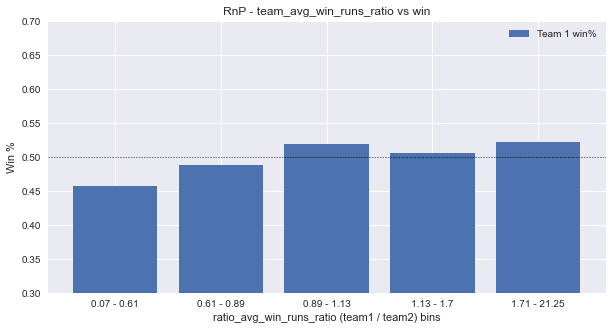

slope: 0.48 / 0.47 =  1.01


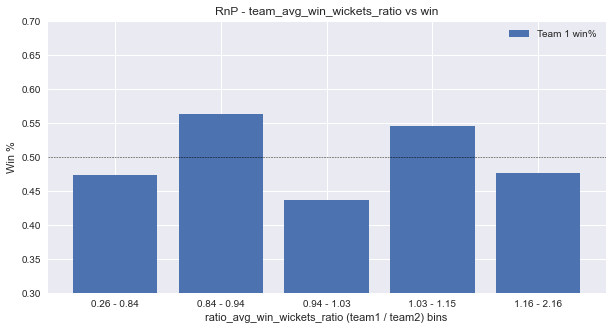

In [33]:
createRnP(df_train, 'team_avg_win_runs_ratio')
createRnP(df_train, 'team_avg_win_wickets_ratio')

In [34]:
df_train.drop(columns=['winner_01'], inplace=True) # Dropping intermediate column made to plot RnP.

In [35]:
df_train['winner_01'] = df_train.apply(lambda x: 1 if (x['team2_id']==x['winner_id']) else 0, axis=1)



In [36]:
df_train['toss_winner_01'] = np.where(df_train['toss winner']==df_train['team2'], 1, 0)
df_test['toss_winner_01'] = np.where(df_test['toss winner']==df_test['team2'], 1, 0)
## Toss decision - categorical - 1 if winner bats, 0 otherwise

df_train['toss_decision_01'] = np.where(df_train['toss decision']=='bat', 1, 0)
df_test['toss_decision_01'] = np.where(df_test['toss decision']=='bat', 1, 0)

In [37]:
df_train.head()

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15,team_avg_total_boundaries_last15,team_avg_win_runs_ratio,team_avg_win_wickets_ratio,winner_01,toss_winner_01,toss_decision_01
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,100.0,157.178571,0.991629,0.056633,0.974171,0.907129,1.172566,0.975000,1,1,0
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,50.0,103.500000,0.977178,0.028851,0.860877,0.937388,2.282913,1.107143,0,1,0
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:3681957.0:7671313.0:5320118.0:2922611.0:7184232.0:7661996.0:6240632.0,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:5516720.0:7328110.0:125915.0:130437.0:7507303.0:4420828.0:5652828.0,We,10576,Ne,field,Tt Be Nm,Nottingham,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,0.0,154.333333,1.106689,0.017863,0.960308,1.050601,0.807314,1.155556,0,1,0
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:4690188.0:4739580.0:4739552.0:5744850.0:2294823.0:9266102.0:284339.0,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:5742470.0:2740408.0:3575774.0:3200756.0:334963.0:6399210.0:6347494.0,Ga An Ws,36084,Ga An Ws,bat,Bn La Sm Ta Td,Tarouba,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,50.0,144.250000,0.959365,0.055896,1.363228,1.294729,1.131274,0.900000,0,0,1
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082.0:4640824.0:5038046.0:8180500.0:2035102.0:3851518.0:7881845.0:7453697.0,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:2252452.0:2966879.0:5554254.0:4690230.0:3373285.0:3759846.0:6496482.0,Gt Ts,48341,Gt Ts,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,0.0,189.000000,0.992473,-0.015698,1.184791,0.834234,0.728000,0.953947,1,1,0


In [38]:
import pandas as pd
import numpy as np
from tqdm import tqdm



def lightingEffectiveness(team_name, lighting, date, n):
    df_team = df_match[((df_match['team1'] == team_name) | (df_match['team2'] == team_name)) & 
                       (df_match['lighting'] == lighting) & 
                       (df_match['match_dt'] < date)]
    

    df_team_last_n = df_team.sort_values(by='match_dt', ascending=False).head(n)
    
   
    wins_under_lighting = df_team_last_n[df_team_last_n['winner'] == team_name]
    
    effectiveness = len(wins_under_lighting) / len(df_team_last_n) if len(df_team_last_n) > 0 else 0
    
    return effectiveness


tqdm.pandas()


df_train['team1_lighting_effectiveness'] = df_train.progress_apply(lambda x: 
    lightingEffectiveness(team_name=x['team1'], lighting=x['lighting'], date=x['match_dt'], n=15), axis=1)
df_train['team2_lighting_effectiveness'] = df_train.progress_apply(lambda x: 
    lightingEffectiveness(team_name=x['team2'], lighting=x['lighting'], date=x['match_dt'], n=15), axis=1)


df_test['team1_lighting_effectiveness'] = df_test.progress_apply(lambda x: 
    lightingEffectiveness(team_name=x['team1'], lighting=x['lighting'], date=x['match_dt'], n=15), axis=1)
df_test['team2_lighting_effectiveness'] = df_test.progress_apply(lambda x: 
    lightingEffectiveness(team_name=x['team2'], lighting=x['lighting'], date=x['match_dt'], n=15), axis=1)


df_train['lighting_effectiveness_ratio'] = (df_train['team1_lighting_effectiveness'] + 1) / (df_train['team2_lighting_effectiveness'] + 1)
df_test['lighting_effectiveness_ratio'] = (df_test['team1_lighting_effectiveness'] + 1) / (df_test['team2_lighting_effectiveness'] + 1)


df_train.drop(columns=['team1_lighting_effectiveness', 'team2_lighting_effectiveness'], inplace=True)
df_test.drop(columns=['team1_lighting_effectiveness', 'team2_lighting_effectiveness'], inplace=True)

100%|██████████| 271/271 [00:00<00:00, 730.83it/s]


slope: 0.58 / 0.47 =  1.25


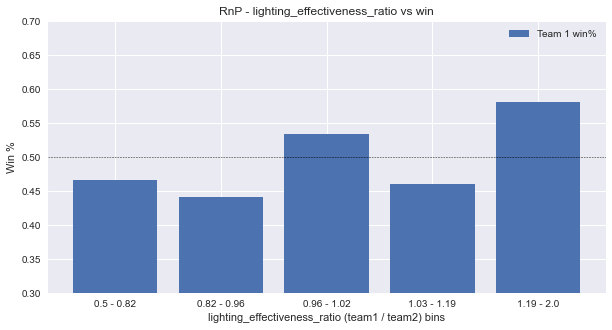

In [39]:
createRnP(df_train, 'lighting_effectiveness_ratio')

In [40]:
def get_last_5_avg_runs(df, team_name, ground_id, match_date):
    team_matches = df[((df['team1'] == team_name) | (df['team2'] == team_name)) & 
                      (df['ground_id'] == ground_id) & 
                      (df['match_dt'] < match_date)]
    
    last_5_matches = team_matches.sort_values(by='match_dt', ascending=False).head(5)
    
    # Calculate the average runs
    runs = []
    for index, row in last_5_matches.iterrows():
        if row['team1'] == team_name:
            runs.append(row['inning1_runs'])
        elif row['team2'] == team_name:
            runs.append(row['inning2_runs'])
    
    if runs:
        return sum(runs) / len(runs)
    else:
        return 0
    
# Function to calculate the ratio for each row in train_data
def calculate_runs_ratio(row, match_df):
    team1_avg_runs = get_last_5_avg_runs(match_df, row['team1'], row['ground_id'], row['match_dt'])
    team2_avg_runs = get_last_5_avg_runs(match_df, row['team2'], row['ground_id'], row['match_dt'])
    
    if team2_avg_runs == 0:
        return 2
    else:
        return team1_avg_runs / team2_avg_runs

# Apply the function to each row in train_data to calculate the ratio
df_train['runs_ratio_last_5'] = df_train.progress_apply(lambda row: calculate_runs_ratio(row, df_match), axis=1)
df_test['runs_ratio_last_5'] = df_test.progress_apply(lambda row: calculate_runs_ratio(row, df_match), axis=1)
df_train.head()
df_test.head()

100%|██████████| 271/271 [00:00<00:00, 445.29it/s]


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15,team_avg_total_boundaries_last15,team_avg_win_runs_ratio,team_avg_win_wickets_ratio,winner_01,toss_winner_01,toss_decision_01,lighting_effectiveness_ratio,runs_ratio_last_5
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:3299407.0:232000.0:7883504.0:8725723.0:7878989.0:2526390.0:8725730.0:4017523.0,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:3698337.0:5058192.0:6844718.0:4566526.0:6596582.0:4161975.0:7952804.0:8465057.0,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,100.0,157.178571,0.991629,0.056633,0.974171,0.907129,1.172566,0.975000,1,1,0,0.500000,0.847134
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409.0:172199.0:2022957.0:1482998.0:1711492.0:4507208.0:3231437.0,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:1613926.0:2740408.0:4739552.0:5744850.0:4690104.0:3715697.0:3468870.0,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,50.0,103.500000,0.977178,0.028851,0.860877,0.937388,2.282913,1.107143,0,1,0,0.500000,0.990385
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:3681957.0:7671313.0:5320118.0:2922611.0:7184232.0:7661996.0:6240632.0,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:5516720.0:7328110.0:125915.0:130437.0:7507303.0:4420828.0:5652828.0,We,10576,Ne,field,Tt Be Nm,Nottingham,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,0.0,154.333333,1.106689,0.017863,0.960308,1.050601,0.807314,1.155556,0,1,0,0.937500,0.570292
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:4690188.0:4739580.0:4739552.0:5744850.0:2294823.0:9266102.0:284339.0,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:5742470.0:2740408.0:3575774.0:3200756.0:334963.0:6399210.0:6347494.0,Ga An Ws,36084,Ga An Ws,bat,Bn La Sm Ta Td,Tarouba,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,50.0,144.250000,0.959365,0.055896,1.363228,1.294729,1.131274,0.900000,0,0,1,0.855615,0.757009
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082.0:4640824.0:5038046.0:8180500.0:2035102.0:3851518.0:7881845.0:7453697.0,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:2252452.0:2966879.0:5554254.0:4690230.0:3373285.0:3759846.0:6496482.0,Gt Ts,48341,Gt Ts,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,0.0,189.000000,0.992473,-0.015698,1.184791,0.834234,0.728000,0.953947,1,1,0,0.920000,2.000000


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15,team_avg_total_boundaries_last15,team1_avg_win_margin_wickets,team2_avg_win_margin_wickets,team_avg_win_runs_ratio,team_avg_win_wickets_ratio,toss_winner_01,toss_decision_01,lighting_effectiveness_ratio,runs_ratio_last_5
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:2590251.0:7785497.0:7785553.0:3296264.0:4613622.0:2904796.0:3685289.0,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:1613870.0:8934764.0:2721480.0:1632819.0:2789604.0:6489846.0:1565507.0,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,0.00,NaN,NaN,NaN,0.766039,0.670732,NaN,NaN,NaN,NaN,1,0,0.500000,2.000000
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188.0:4739552.0:4690328.0:5744850.0:4739580.0:9266102.0:284339.0,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:3150720.0:4690104.0:181404.0:1594319.0:5509524.0:4239794.0:2036649.0,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,66.67,153.500,0.896853,0.012900,1.087214,1.022600,7.500000,5.0,0.397527,1.416667,1,0,0.937500,2.000000
2,9128776,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:7556051.0:2486896.0:184960.0:1945397.0:6420126.0:3011735.0:6347494.0,Lw Sr Gs,48334,2654014.0:2954769.0:8058903.0:3479860.0:3299407.0:2275097.0:2740408.0:3865077.0:7924048.0:4859490.0:8228100.0,Rn Rs,bat,Be Sm Mi,Mumbai,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,100.00,179.625,0.977652,-0.139186,0.908587,1.105987,5.500000,6.0,0.841165,0.928571,0,1,0.894444,1.058537
3,9586919,Ja Ts,36098,4690258.0:8464385.0:1613898.0:5744780.0:3150720.0:4690104.0:1594319.0:5509524.0:2036649.0:3023383.0:5471948.0,St La Ks,36112,2331475.0:313809.0:391103.0:2742837.0:2097017.0:7921535.0:7459647.0:8464343.0:4690230.0:8339701.0:4702774.0,St La Ks,field,Dn Sy Nl Ct Sm Gs It St La,Gros Islet,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,75.00,155.500,0.994048,0.048260,0.730421,0.723574,5.000000,4.0,1.152597,1.200000,1,0,1.333333,0.960814
4,9128538,Ci Sr Ks,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:1642738.0:196580.0:360086.0:2022957.0:7968225.0:7879829.0,Gt Ts,48341,1958683.0:7491224.0:3339160.0:5452754.0:2252452.0:2966879.0:5554254.0:4690230.0:3456424.0:3373285.0:8118053.0,Gt Ts,field,Ma Ct An Sm Pe,Pune,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,0.00,164.125,0.971212,-0.065776,1.059989,1.209625,5.166667,NaN,1.308176,NaN,1,0,0.960000,0.000000


slope: 0.49 / 0.46 =  1.06


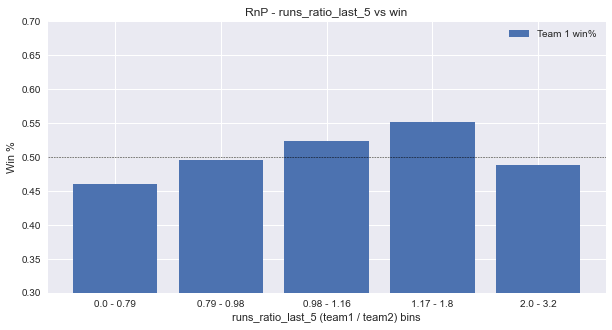

In [41]:
createRnP(df_train, 'runs_ratio_last_5')

In [42]:
train_null = df_train.isna().sum()
test_null = df_test.isna().sum()
train_null
test_null

match id                            0  
team1                               0  
team1_id                            0  
team1_roster_ids                    0  
team2                               0  
team2_id                            0  
team2_roster_ids                    0  
winner                              0  
winner_id                           0  
toss winner                         0  
toss decision                       0  
venue                               0  
city                                0  
match_dt                            0  
lighting                            0  
series_name                         0  
season                              0  
ground_id                           0  
team_count_50runs_last15            0  
team_winp_last5                     0  
team1_winp_team2_last15             0  
ground_avg_runs_last15              53 
team_avg_runs_last15                35 
team_avg_bowling_economy_last15     21 
team_avg_strike_rate_last15         20 


match id                            0 
team1                               0 
team1_id                            0 
team1_roster_ids                    0 
team2                               0 
team2_id                            0 
team2_roster_ids                    0 
toss winner                         0 
toss decision                       0 
venue                               0 
city                                0 
match_dt                            0 
lighting                            0 
series_name                         0 
season                              0 
ground_id                           0 
team_count_50runs_last15            0 
team_winp_last5                     0 
team1_winp_team2_last15             0 
ground_avg_runs_last15              10
team_avg_runs_last15                9 
team_avg_bowling_economy_last15     4 
team_avg_strike_rate_last15         2 
team_avg_total_boundaries_last15    2 
team1_avg_win_margin_wickets        24
team2_avg_win_margin_wick

In [43]:
# Get the rows where team_avg_strike_rate is null
null_strike_rate_rows = df_train[df_train['ground_avg_runs_last15'].isna()]
null_strike_rate_rows.head()
null_strike_rate_rows.shape

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15,team_avg_total_boundaries_last15,team_avg_win_runs_ratio,team_avg_win_wickets_ratio,winner_01,toss_winner_01,toss_decision_01,lighting_effectiveness_ratio,runs_ratio_last_5
6,9292548,Aa,27,7537004.0:37351.0:1870357.0:2275195.0:4635658.0:6249256.0:1611364.0:5788320.0:3429236.0:2656541.0:2018001.0,Ia,55,2954769.0:238727.0:1776627.0:3125562.0:4377610.0:210328.0:3882850.0:2733380.0:2282125.0:4377694.0:3011735.0,Ia,55,Ia,field,Rv Gi Il Sm Ul Hd,Hyderabad,2022-09-25,night match,Aa tr of Ia,2022,13880,0.700000,1.487805,50.0,NaN,0.826625,0.111439,1.160331,0.952154,0.651852,0.953526,1,1,0,0.884615,2.0
21,9866373,Oo,18360,2319638.0:8444855.0:4172706.0:7907444.0:6317142.0:7918280.0:8354716.0:7907479.0:3490150.0:7213856.0:4195827.0,Wn,18570,9036516.0:8271969.0:3913447.0:9523954.0:8354786.0:6718410.0:7907486.0:3083667.0:4950294.0:4950266.0:4195708.0,Wn,18570,Oo,bat,Mx Pk Aa,Alexandra,2023-12-28,day/night match,Sr Sh,2023/24,5382,1.400000,1.487805,0.0,NaN,1.050399,-0.207918,1.273930,0.991641,0.461373,0.563380,1,0,1,0.666667,2.0
34,9176320,Nw Zd,48,1585457.0:6718326.0:3083632.0:2672214.0:5764576.0:2486896.0:3519011.0:3913475.0:3456424.0:6718396.0:5984376.0,Ns,118,1635997.0:4502392.0:7253350.0:1539208.0:7891232.0:7905309.0:3083667.0:8354849.0:4164985.0:8947777.0:8404325.0,Nw Zd,48,Nw Zd,bat,Sk Wt Te He,The Hague,2022-08-04,day/night match,Nw Zd tr of Ns,2022,17765,3.600000,1.975610,0.0,NaN,1.398867,0.080345,1.134690,1.175153,NaN,0.975000,0,0,1,1.400000,2.0
56,9249162,Ch Rc,895,8392194.0:9198405.0:8095317.0:8095324.0:9198412.0:9198384.0:8846039.0:8095352.0:9265367.0:9265374.0:8095359.0,Aa,300,8392145.0:8392131.0:8096451.0:7326220.0:7712494.0:9227455.0:8846102.0:8392152.0:4556222.0:8846081.0:8846074.0,Aa,300,Aa,field,St Pe Fd Vr,Prague,2022-07-09,day match,Aa tr of Ch Rc,2022,24828,1.000000,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0.700000,2.0
96,9484481,Le Qs,40606,3585350.0:9320597.0:4069666.0:4365465.0:2097017.0:4397693.0:1547993.0:1482998.0:7507303.0:8131255.0:8907338.0,Mn Ss,44904,1637320.0:2263736.0:2252452.0:1613926.0:5017144.0:7864009.0:4533682.0:3715697.0:6460642.0:8427978.0:8986193.0,Le Qs,40606,Mn Ss,field,Mn Ct Sm,Multan,2023-02-13,night match,Pn Sr Le,2022/23,11192,0.857143,0.753086,25.0,NaN,0.951025,-0.229915,1.040769,0.870544,0.347913,0.925000,0,1,0,0.996047,2.0


(53, 33)

In [44]:
null_avg_runs_rows = df_train[df_train['team_avg_bowling_economy_last15'].isna()]
null_avg_runs_rows.head()
null_avg_runs_rows.shape

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,team_avg_runs_last15,team_avg_bowling_economy_last15,team_avg_strike_rate_last15,team_avg_total_boundaries_last15,team_avg_win_runs_ratio,team_avg_win_wickets_ratio,winner_01,toss_winner_01,toss_decision_01,lighting_effectiveness_ratio,runs_ratio_last_5
19,9657059,Ra,1350,8058805.0:8089192.0:8089276.0:8058812.0:8964668.0:8913876.0:8058798.0:8089206.0:8964710.0:8058840.0:8913897.0,Ua,251,1634709.0:3719197.0:9663968.0:7906968.0:5120674.0:8246440.0:8246419.0:8964843.0:182986.0:7753549.0:2943443.0,Ua,251,Ra,bat,Ga Cb Gd Ni,Nairobi,2023-06-11,day match,Ua tr of Ka,2023,4913,0.333333,0.012346,0.0,132.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0.571429,0.000000
56,9249162,Ch Rc,895,8392194.0:9198405.0:8095317.0:8095324.0:9198412.0:9198384.0:8846039.0:8095352.0:9265367.0:9265374.0:8095359.0,Aa,300,8392145.0:8392131.0:8096451.0:7326220.0:7712494.0:9227455.0:8846102.0:8392152.0:4556222.0:8846081.0:8846074.0,Aa,300,Aa,field,St Pe Fd Vr,Prague,2022-07-09,day match,Aa tr of Ch Rc,2022,24828,1.000000,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0.700000,2.000000
133,9684576,Ma,45954,3388412.0:8118494.0:8228149.0:8724995.0:8118529.0:4020757.0:9410757.0:8228163.0:8766232.0:8442195.0:8118501.0:9009090.0,Ju Kr,13166,3801559.0:8187276.0:8477790.0:5742498.0:8442377.0:8130436.0:8410765.0:8725709.0:8766575.0:7953518.0:9105053.0,Ju Kr,13166,Ma,bat,Si Mh Sm Jr,Jaipur,2023-10-23,day/night match,Sd Mq Ai Ty,2023/24,4661,1.000000,2.904762,0.0,128.666667,0.876768,NaN,0.345536,1.074074,NaN,1.175000,1,0,1,1.000000,0.572687
179,9250387,Se,174,7692334.0:7342362.0:2154438.0:7342250.0:3167793.0:8096829.0:6816606.0:5425146.0:8366728.0:3878489.0:9253943.0,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:7785497.0:7785574.0:3296264.0:4613622.0:2904796.0:3685289.0:3296271.0,Jy,28594,Se,bat,Bo Ac Cb,Bulawayo,2022-07-17,day match,Se tr of Ze,2022,3226,1.000000,1.000000,0.0,140.000000,NaN,NaN,0.857111,0.883333,NaN,NaN,1,0,1,1.000000,2.000000
182,9684177,Ma,45954,9822070.0:3388412.0:9822077.0:8118494.0:8228149.0:8118529.0:4020757.0:8724995.0:8228163.0:8442195.0:9009090.0:8118501.0,Mi,11591,8058959.0:9047478.0:1945425.0:5001170.0:1945698.0:4497688.0:9047695.0:7881733.0:5757884.0:7921262.0:8766365.0,Mi,11591,Mi,field,Si Mh Sm Jr,Jaipur,2023-10-17,day match,Sd Mq Ai Ty,2023/24,4661,0.090909,1.327869,0.0,139.363636,0.796485,NaN,NaN,NaN,2.382979,1.342857,1,1,0,1.282051,2.000000


(21, 33)

In [45]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from itertools import combinations, product
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import IterativeImputer

# Assuming df_train and df_test are defined
# Extract features and labels from the training and test data
features = [
    'toss_winner_01', 'toss_decision_01','lighting_effectiveness_ratio', 'team_count_50runs_last15', 'team_winp_last5', 
    'team_avg_runs_last15', 'team1_winp_team2_last15', 'runs_ratio_last_5',
    'team_avg_bowling_economy_last15', 'team_avg_strike_rate_last15', 
    'team_avg_win_runs_ratio', 'team_avg_win_wickets_ratio'
]

# Handling missing values using SimpleImputer
numerical_features = [
    'lighting_effectiveness_ratio', 'team_count_50runs_last15', 'team_winp_last5', 
    'team_avg_runs_last15', 'team1_winp_team2_last15', 'runs_ratio_last_5',
    'team_avg_bowling_economy_last15', 'team_avg_strike_rate_last15', 
    'team_avg_win_runs_ratio', 'team_avg_win_wickets_ratio']

categorical_features = ['toss_winner_01', 'toss_decision_01']

knn_imputer = KNNImputer(n_neighbors=3)
df_train[numerical_features] = knn_imputer.fit_transform(df_train[numerical_features])
df_test[numerical_features] = knn_imputer.transform(df_test[numerical_features])


iterative_imputer = IterativeImputer(max_iter=10, random_state=42)
df_train[categorical_features] = iterative_imputer.fit_transform(df_train[categorical_features])
df_test[categorical_features] = iterative_imputer.transform(df_test[categorical_features])


X_train, y_train = df_train[features], df_train['winner_01']
X_new = df_test[features]



In [46]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train['winner_01'], train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((758, 12), (190, 12))

In [47]:
class BlendedModel:
    def __init__(self, xgb_params, lgbm_params,cat_params):
        self.model_xgb = XGBClassifier(**xgb_params)
        self.model_lgbm = LGBMClassifier(**lgbm_params)
        self.model_cat=CatBoostClassifier(**cat_params)
       
        self.xgb_wt=0.5
        self.lgbm_wt=0.5
        self.cat_wt=0.5
        
    
    def fit(self, X_train, y_train):
        self.model_xgb.fit(X_train, y_train)
        self.model_lgbm.fit(X_train, y_train)
        self.model_cat.fit(X_train,y_train)
        
        
        xgb_accuracy=self.model_xgb.score(X_test,y_test)
        lgbm_accuracy=self.model_lgbm.score(X_test,y_test)
        cat_accuracy= self.model_cat.score(X_test,y_test) 
        
        total_accuracy= xgb_accuracy+lgbm_accuracy+cat_accuracy
        
        self.xgb_wt=xgb_accuracy/total_accuracy
        self.lgb_wt=lgbm_accuracy/total_accuracy
        self.cat_wt=cat_accuracy/total_accuracy
        
             
        
        
    def predict_proba(self, X):
        pred_xgb= self.model_xgb.predict_proba(X)[:, 1]
        pred_lgbm = self.model_lgbm.predict_proba(X)[:, 1]
        pred_cat=self.model_cat.predict_proba(X)[:,1]
        
        
        return (self.xgb_wt*pred_xgb +  self.lgb_wt*pred_lgbm+self.cat_wt*pred_cat)
      




    
    def predict(self, X):
        blended_pred = self.predict_proba(X)
        return (blended_pred > 0.5).astype(int)

    def evaluate(self, X, y):
        predictions = self.predict(X)
        print(classification_report(y, predictions))
    
    def feature_importances_(self):
        imp_xgb = self.model_xgb.feature_importances_
        imp_lgbm = self.model_lgbm.feature_importances_
        imp_cat=self.model_cat.feature_importances_
       
        return (imp_xgb + imp_lgbm+imp_cat)/3

In [69]:
params_xgb = {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 11.0, 'n_estimators': 95, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.5,'gamma':1.2}


params_lgbm={'bagging_fraction': 0.5594791527174129, 'bagging_freq': 2, 'learning_rate': 0.05, 'max_depth': 2, 'min_data_in_leaf': 91, 'n_estimators': 28, 'num_leaves':66,'random_state':50}

## Define parameter sets for each model
cat_params={'bagging_temperature': 0.50, 'border_count': 100, 'depth': 5, 'iterations': 20, 'l2_leaf_reg': 3.6685373079500114, 'learning_rate': 0.001,'random_state':70}

blended_model=BlendedModel(params_xgb,params_lgbm,cat_params)
blended_model.fit(X_train, y_train)

# Predictions on training set

# Evaluate the blended model
blended_model.evaluate(X_test, y_test)




[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_fraction is set=0.7975504299455805, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7975504299455805
0:	learn: 0.6931123	total: 1.61ms	remaining: 30.6ms
1:	learn: 0.6930875	total: 4.04ms	remaining: 36.4ms
2:	learn: 0.6930535	total: 5.34ms	remaining: 30.3ms
3:	learn: 0.6930255	total: 6.49ms	remaining: 26ms
4:	learn: 0.6929836	total: 7.67ms	remaining: 23ms
5:	learn: 0.6929430	total: 9.02ms	remaining: 21.1ms
6:	learn: 0.6929124	total: 10.2ms	remaining: 19ms
7:	learn: 0.6928742	total: 11.3ms	remaining: 17ms
8:	learn: 0.6928369	total: 12.5ms	remaining: 15.3ms
9:	learn: 0.6928038	total: 13.6ms	remaining: 13.6ms
10:	learn: 0.6927564	total: 14.9ms	remaining: 12.2ms
11:	learn: 0.6927151	total: 16.2ms	remaining: 10.8ms
12:	learn: 0.6926739	total: 17.2ms	remaining: 9.25ms
13:	learn: 0.6926386	total: 18.3ms	remaining: 7.85ms
14:	lea

In [70]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
prediction = blended_model.predict(X_test)
confusion_matrix(y_test, prediction)
accuracy_score(y_test, prediction)

array([[51, 48],
       [28, 63]], dtype=int64)

0.6

In [50]:
df_train['y_pred_01'] =blended_model.predict(df_train[features])
df_train['win_pred_score'] =blended_model.predict_proba(df_train[features])
df_train['win_pred_score'] = np.where((df_train['y_pred_01'] == 0), (1 - df_train['win_pred_score']), df_train['win_pred_score'])
df_train['win_pred_team_id'] = np.where((df_train['y_pred_01'] == 0), (df_train['team1_id']), df_train['team2_id'])

# Predictions on test set
df_test['y_pred_01'] =blended_model.predict(X_new)
df_test['win_pred_score'] =blended_model.predict_proba(X_new)
df_test['win_pred_score'] = np.where((df_test['y_pred_01'] == 0), (1 - df_test['win_pred_score']), df_test['win_pred_score'])
df_test['win_pred_team_id'] = np.where((df_test['y_pred_01'] == 0), (df_test['team1_id']), df_test['team2_id'])

In [51]:
!pip3 install bayesian-optimization


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from bayes_opt import BayesianOptimization
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def xgb_cv(n_estimators, learning_rate, max_depth, subsample, colsample_bytree, gamma, reg_alpha, reg_lambda):
    params = {
        'n_estimators': int(n_estimators),
        'learning_rate': learning_rate,
        'max_depth': int(max_depth),
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'gamma': gamma,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'random_state': 42
    }
    model = XGBClassifier(**params)
    cv_result = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return cv_result.mean()

pbounds_xgb = {
    'n_estimators': (95, 95),
    'learning_rate': (0.05, 0.05),
    'max_depth': (2, 2),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 50),
    'reg_alpha': (0, 20),
    'reg_lambda': (0, 20)
}

optimizer_xgb = BayesianOptimization(f=xgb_cv, pbounds=pbounds_xgb, random_state=42)
optimizer_xgb.maximize(init_points=10, n_iter=100)

best_params_xgb = optimizer_xgb.max['params']
best_params_xgb['n_estimators'] = int(best_params_xgb['n_estimators'])
best_params_xgb['max_depth'] = int(best_params_xgb['max_depth'])



|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
| 1         | 0.5092    | 0.6873    | 47.54     | 0.05      | 2.0       | 95.0      | 3.12      | 1.162     | 0.9331    |
| 2         | 0.5092    | 0.8006    | 35.4      | 0.05      | 2.0       | 95.0      | 4.247     | 3.636     | 0.5917    |
| 3         | 0.5092    | 0.6521    | 26.24     | 0.05      | 2.0       | 95.0      | 2.79      | 5.843     | 0.6832    |
| 4         | 0.5092    | 0.728     | 39.26     | 0.05      | 2.0       | 95.0      | 0.929     | 12.15     | 0.5853    |
| 5         | 0.5092    | 0.5325    | 47.44     | 0.05      | 2.0       | 95.0      | 1.953     | 13.68     | 0.7201    |
| 6         | 0.5092    | 0.561     | 24.76     | 0.05      | 2.0       | 95.0      | 13.25     | 6.234     | 0.76      |
| 7         | 0.4908    

In [53]:
from lightgbm import LGBMClassifier

def lgb_cv(n_estimators, learning_rate, num_leaves, max_depth, min_data_in_leaf, bagging_fraction):
    params = {
        'n_estimators': int(n_estimators),
        'learning_rate': learning_rate,
        'num_leaves': int(num_leaves),
        'max_depth': int(max_depth),
        'min_data_in_leaf': int(min_data_in_leaf),
        'bagging_fraction': bagging_fraction,
        'objective': 'binary',
        'random_state': 42
    }
    model = LGBMClassifier(**params)
    cv_result = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    return cv_result.mean()

pbounds_lgb = {
    'n_estimators': (28, 28),
    'learning_rate': (0.05, 0.05),
    'num_leaves': (10, 100),
    'max_depth': (2, 2),
    'min_data_in_leaf': (10, 100),
    'bagging_fraction': (0.5, 1.0)
}

optimizer_lgb = BayesianOptimization(f=lgb_cv, pbounds=pbounds_lgb, random_state=42)
optimizer_lgb.maximize(init_points=10, n_iter=100)

best_params_lgb = optimizer_lgb.max['params']
best_params_lgb['n_estimators'] = int(best_params_lgb['n_estimators'])
best_params_lgb['num_leaves'] = int(best_params_lgb['num_leaves'])
best_params_lgb['max_depth'] = int(best_params_lgb['max_depth'])
best_params_lgb['min_data_in_leaf'] = int(best_params_lgb['min_data_in_leaf'])



|   iter    |  target   | baggin... | learni... | max_depth | min_da... | n_esti... | num_le... |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=63, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=63
[LightGBM] [Warning] bagging_fraction is set=0.6872700594236812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6872700594236812
[LightGBM] [Warning] min_data_in_leaf is set=63, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=63
[LightGBM] [Warning] bagging_fraction is set=0.6872700594236812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6872700594236812
[LightGBM] [Warning] min_data_in_leaf is set=63, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=63
[LightGBM] [Warning] bagging_fraction is set=0.6872700594236812, subsample=1.0 will be ignored. Current value: bagging_fraction=0.68727005942368

In [54]:
# Get feature importances
feature_importances = blended_model.feature_importances_()

# Create a DataFrame for feature importances
df_feat_importance = pd.DataFrame({'feat_name': X_train.columns.tolist(), 'model_feat_imp_train': feature_importances * 1.00})\
                      .sort_values(by='model_feat_imp_train', ascending=False).reset_index(drop=True).head(10)

print(df_feat_importance)

                         feat_name  model_feat_imp_train
0  team_count_50runs_last15         13.491455           
1  team_avg_bowling_economy_last15  8.934594            
2  team_avg_strike_rate_last15      6.632005            
3  team_avg_runs_last15             5.123550            
4  lighting_effectiveness_ratio     4.209973            
5  team_winp_last5                  4.117647            
6  toss_winner_01                   2.352220            
7  team_avg_win_wickets_ratio       2.292997            
8  runs_ratio_last_5                2.080130            
9  team_avg_win_runs_ratio          1.436772            


In [55]:
df_train['dataset_type'] = 'train'
df_test['dataset_type'] = 'r1'

In [56]:

df_file1 = pd.concat([df_test[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))], \
                     df_train[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))]])

renaming_dict = {}
for i,col in enumerate(list(df_feat_importance['feat_name'].head(10))):
    renaming_dict[col] = f'indep_feat_id{i+1}'
df_file1.rename(columns=renaming_dict, inplace=True)

for i in range(1,11):
    if f'indep_feat_id{i}' not in df_file1.columns:
        df_file1[f'indep_feat_id{i}'] = np.nan



df_file1['train_algorithm'] = 'XGBClassifier;LGBMClassifier;CatBoostClassifier'
df_file1['is_ensemble'] = 'yes'
df_file1['train_hps_trees'] = '95;28;20'
df_file1['train_hps_depth'] = '2;2;5'
df_file1['train_hps_lr'] = '0.05;0.05;0.001'

In [57]:
df_file1.shape
df_file1.head(10)
 

(1219, 19)

,match id,dataset_type,win_pred_team_id,win_pred_score,indep_feat_id1,indep_feat_id2,indep_feat_id3,indep_feat_id4,indep_feat_id5,indep_feat_id6,indep_feat_id7,indep_feat_id8,indep_feat_id9,indep_feat_id10,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr
0,9250275,r1,90,0.564618,0.000000,0.090406,0.766039,0.908054,0.500000,0.019608,1.0,0.886590,2.000000,1.468509,XGBClassifier;LGBMClassifier;CatBoostClassifier,yes,95;28;20,2;2;5,0.05;0.05;0.001
1,9262189,r1,36098,0.529730,0.615385,0.012900,1.087214,0.896853,0.937500,0.344262,1.0,1.416667,2.000000,0.397527,XGBClassifier;LGBMClassifier;CatBoostClassifier,yes,95;28;20,2;2;5,0.05;0.05;0.001
2,9128776,r1,48334,0.524220,0.842105,-0.139186,0.908587,0.977652,0.894444,0.753086,0.0,0.928571,1.058537,0.841165,XGBClassifier;LGBMClassifier;CatBoostClassifier,yes,95;28;20,2;2;5,0.05;0.05;0.001
3,9586919,r1,36112,0.526920,0.285714,0.048260,0.730421,0.994048,1.333333,1.487805,1.0,1.200000,0.960814,1.152597,XGBClassifier;LGBMClassifier;CatBoostClassifier,yes,95;28;20,2;2;5,0.05;0.05;0.001
4,9128538,r1,30414,0.518627,2.375000,-0.065776,1.059989,0.971212,0.960000,0.310330,1.0,0.962865,0.000000,1.308176,XGBClassifier;LGBMClassifier;CatBoostClassifier,yes,95;28;20,2;2;5,0.05;0.05;0.001
5,9516653,r1,30435,0.542341,0.400000,0.132789,0.902097,1.059921,1.047619,0.672131,1.0,0.995122,2.000000,1.278090,XGBClassifier;LGBMClassifier;CatBoostClassifier,yes,95;28;20,2;2;5,0.05;0.05;0.001
6,9516534,r1,30414,0.542317,0.681818,0.012998,0.998175,1.017279,0.869565,0.344262,1.0,1.444444,0.665899,0.585859,XGBClassifier;LGBMClassifier;CatBoostClassifier,yes,95;28;20,2;2;5,0.05;0.05;0.001
7,9085474,r1,9701,0.522863,3.200000,0.163252,0.961153,1.016522,0.984615,0.603960,1.0,1.029240,2.000000,0.659259,XGBClassifier;LGBMClassifier;CatBoostClassifier,yes,95;28;20,2;2;5,0.05;0.05;0.001
8,9433752,r1,7727,0.594599,2.428571,0.135598,1.022828,0.935065,1.227273,2.904762,1.0,1.138889,0.920652,1.640000,XGBClassifier;LGBMClassifier;CatBoostClassifier,yes,95;28;20,2;2;5,0.05;0.05;0.001
9,9516359,r1,30428,0.521455,1.727273,-0.182029,1.107963,0.994222,1.041667,21.000000,1.0,0.750000,2.000000,5.114286,XGBClassifier;LGBMClassifier;CatBoostClassifier,yes,95;28;20,2;2;5,0.05;0.05;0.001


In [58]:
feature_desc = {'team_count_50runs_last15':'Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games',\
               'team_winp_last5':'Ratio of team1\'s win % to team2\'s win % in last 5 games',\
               'ground_avg_runs_last15':'average runs scored in the ground in last 15 games',\
               'team1_winp_team2_last15':'Team1\'s win percentage against Team2 in last 15 games',\
               'team1only_avg_runs_last15':'team1\'s avg inning runs in last 15 games',\
                
               'toss_winner_01' : 'Toss winner to numerical - 1 if team2 wins, else 0',\
               'toss_decision_01' : 'Toss decision - categorical - 1 if winner bats, 0 otherwise'}

In [59]:
# df_feat_importance.rename(index={0:'feat_id'}, inplace=True)
df_file2 = df_feat_importance
df_file2['feat_id'] = [i+1 for i in df_file2.index]
df_file2['feat_rank_train'] = [i+1 for i in df_file2.index]
df_file2 = df_file2.set_index('feat_id')
df_file2['feat_description'] = df_file2['feat_name'].map(feature_desc)

In [60]:
df_file2

,feat_name,model_feat_imp_train,feat_rank_train,feat_description
feat_id,,,,
1,team_count_50runs_last15,13.491455,1,Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games
2,team_avg_bowling_economy_last15,8.934594,2,NaN
3,team_avg_strike_rate_last15,6.632005,3,NaN
4,team_avg_runs_last15,5.123550,4,NaN
5,lighting_effectiveness_ratio,4.209973,5,NaN
6,team_winp_last5,4.117647,6,Ratio of team1's win % to team2's win % in last 5 games
7,toss_winner_01,2.352220,7,"Toss winner to numerical - 1 if team2 wins, else 0"
8,team_avg_win_wickets_ratio,2.292997,8,NaN
9,runs_ratio_last_5,2.080130,9,NaN


In [61]:
df_file2 = df_file2.fillna('average')

In [62]:
df_file1.to_csv('output_rnd1/2024_DS_Track_File1_YoManas@IITG.csv', index=False)
df_file2.to_csv('output_rnd1/2024_DS_Track_File2_YoManas@IITG.csv')

In [66]:
import dill
import pickle
# Serialize the model using dill.
with open("model.dill", "wb") as f:
    dill.dump(blended_model, f, protocol=pickle.HIGHEST_PROTOCOL)